Failed to import duecredit due to No module named 'duecredit'


<IPython.core.display.Javascript object>


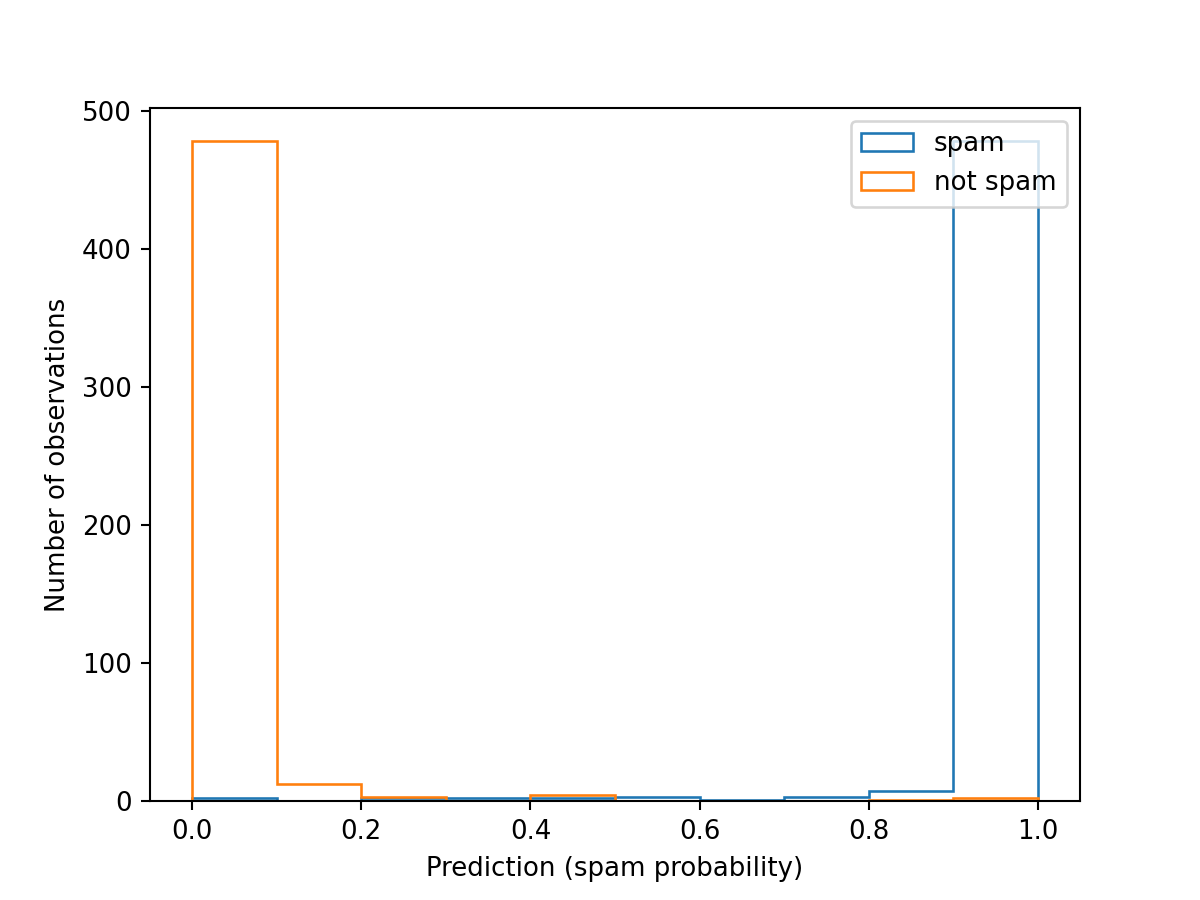

<IPython.core.display.Javascript object>


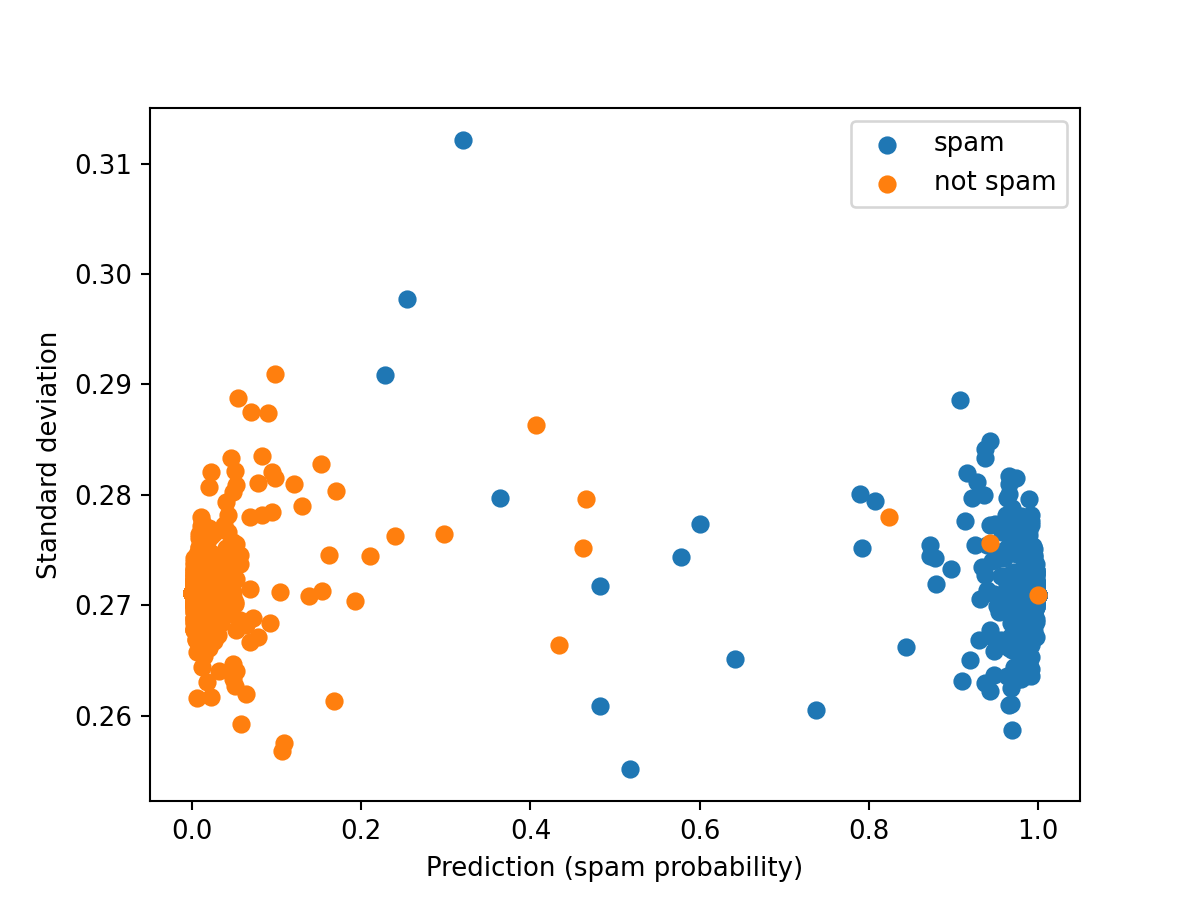

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import forestci as fci
from sklearn.datasets import make_classification

spam_X, spam_y = make_classification(5000)

# split the datainto training and test set
spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(
                                                       spam_X, spam_y,
                                                       test_size=0.2)

# create RandomForestClassifier
n_trees = 500
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees,
                                  random_state=42)
spam_RFC.fit(spam_X_train, spam_y_train)
spam_y_hat = spam_RFC.predict_proba(spam_X_test)

idx_spam = np.where(spam_y_test == 1)[0]
idx_ham = np.where(spam_y_test == 0)[0]

# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
ax.hist(spam_y_hat[idx_spam, 1], histtype='step', label='spam')
ax.hist(spam_y_hat[idx_ham, 1], histtype='step', label='not spam')
ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Number of observations')
plt.legend()

# Calculate the variance
spam_V_IJ_unbiased = fci.random_forest_error(spam_RFC, spam_X_train,
                                             spam_X_test)

# Plot forest prediction for emails and standard deviation for estimates
# Blue points are spam emails; Green points are non-spam emails
fig, ax = plt.subplots(1)
ax.scatter(spam_y_hat[idx_spam, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_spam]),
           label='spam')

ax.scatter(spam_y_hat[idx_ham, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_ham]),
           label='not spam')

ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()